In [31]:
from earl_nema import NemaRC

import pydicom
from pydicom.tag import Tag
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
recon_dir = '/Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/'
its_list = os.listdir(recon_dir)
its_dirs = []

its = Tag(0x00910b2) #gives the number of iterations used in the recon

for i in its_list:
    its_dirs.append(os.path.join(recon_dir,i))


its_cov = [] #fill with COV extracted from NemaRC class instance
iterations = [] #fill with extracted number of iterations from DICOM headers
RC = [] #list of NemaRC class instances
for j in its_dirs:
    image_list = os.listdir(j)
    image_path = os.path.join(j,image_list[0])
    image = pydicom.dcmread(image_path)
    iterations.append(image[its].value)
    RC.append(NemaRC(j,20,0))
    its_cov.append(a.COV)

#Function to pick out a particular iteration, it, from list of NemaRC objects
def RC_iter(it):
    i = iterations.index(it)
    return RC[i]

Reading dicom directory: /Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/28_its_16_subs
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/13_its_16_subs
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Calculating recovery coefficients for each sphere...
Calculating coefficient of variation...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/UVic/PETCT/Dose Optimization Project/VIC March 18/t0/ActivityGuide2/7_its_16_subs
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using th

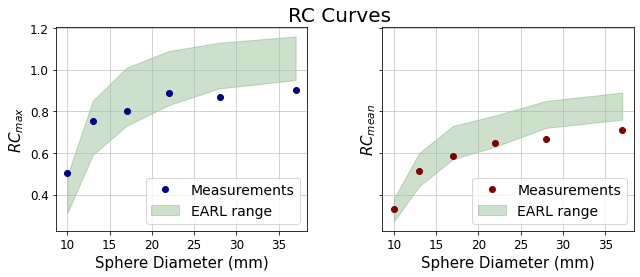

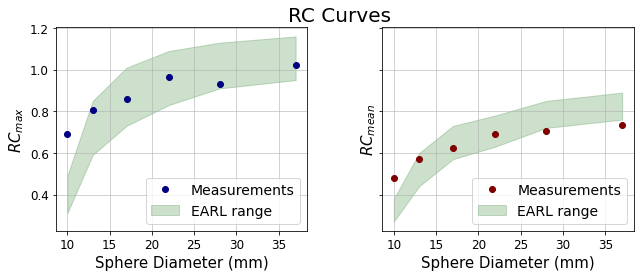

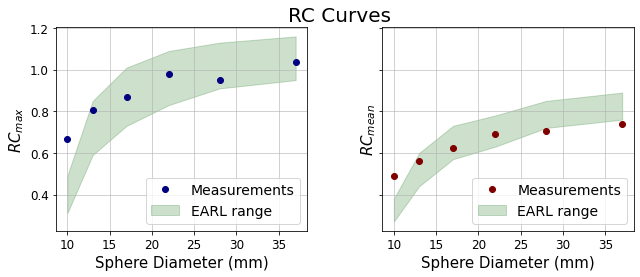

In [60]:
a = RC_iter(2)
b = RC_iter(10)
c = RC_iter(30)

a.plot_RCs()
b.plot_RCs()
c.plot_RCs()

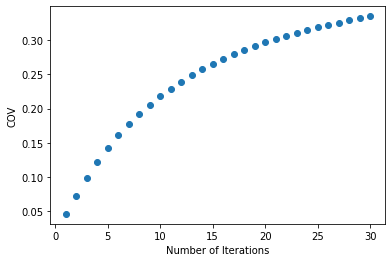

In [44]:

plt.plot(iterations,its_cov,marker='o',linestyle='')
plt.xlabel('Number of Iterations')
plt.ylabel('COV')
plt.show()

In [45]:
# Check the slope and intercept values from the DICOM headers of iterations 1-30

slope = Tag(0x0281052)
intercept = Tag(0x0281053)

slope_check = []
int_check  = []
for j in its_dirs:
    image_list = os.listdir(j)
    image_path = os.path.join(j,image_list[0])
    image = pydicom.dcmread(image_path)
    slope_check.append(image[slope].value)
    int_check.append(image[intercept].value)

print(slope_check)
print(int_check)

["0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0"]
["0.28961282968521", "0.2681750357151", "0.2192251086235", "0.28415089845657", "0.27656280994415", "0.28694471716881", "0.10215649008751", "0.2331501096487", "0.07857549935579", "0.28903087973595", "0.274255245924", "0.28518134355545", "0.15549194812775", "0.25239855051041", "0.28169804811478", "0.29064339399338", "0.12853641808033", "0.28770437836647", "0.27852720022202", "0.28299784660339", "0.20167471468449", "0.2640728354454", "0.29014864563942", "0.28022116422653", "0.25893372297287", "0.18028745055199", "0.28610756993294", "0.27150535583496", "0.28839695453644", "0.24399670958519"]


In [50]:
'its'+str(3) = a

SyntaxError: cannot assign to operator (<ipython-input-50-8e46a0f84fd0>, line 1)